In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, f1_score
from matplotlib.colors import ListedColormap
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn import metrics
import spacy
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer, TfidfTransformer
import nltk
from sqlalchemy import create_engine
from spacy.en import English
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from IPython.display import Image
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report
from sqlalchemy import create_engine
import patsy
from sklearn import neighbors, metrics
import seaborn as sns
sns.set(color_codes=True)
import os
from imdbpie import Imdb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import subprocess
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import scipy
from imdbpie import Imdb
import requests
import nltk
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup
import nltk
from collections import Counter
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
import re
import csv
import psycopg2
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.tokenize import sent_tokenize, word_tokenize
%matplotlib inline

In [108]:
import pandas as pd

df = pd.read_csv('/Users/Paul/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-06/summaryMovie.csv')

In [109]:
df.head(1)

title       location    summary_review  review_score  movie_score  \
0  Raptor Ranch  United States  really not good            2.0          3.1   

    genre  
0  Action

In [110]:
df.isnull().sum()

title             0
location          0
summary_review    3
review_score      0
movie_score       0
genre             0
dtype: int64

In [111]:
df = df.dropna()

In [112]:
df.isnull().sum()

title             0
location          0
summary_review    0
review_score      0
movie_score       0
genre             0
dtype: int64

### Split data into X and y dataframes

In [113]:
#pull out reviews for x dataframe
X = df.ix[:,[2]]

In [114]:
#pull out user ratings for y dataframe
y = df.ix[:,[3]]

In [115]:
X.head()

summary_review
0                                   really not good 
1  you 're better off stay well clear from this r...
2   so messy it should be raptor ranch dressing ... 
3                                of reptile and man 
4                      a lot better then people say

In [116]:
###########################################################################
## need to add step here to stem or lematize or clean before vectorizing ##
###########################################################################

### need to vectorize before splitting!! otherwise run into error modeling on mismatching data 

In [117]:
cvecX = CountVectorizer(stop_words='english')
cvecX = cvecX.fit(X.summary_review)

In [118]:
X_TEST = pd.DataFrame(cvecX.transform(X['summary_review']).todense(),
                       columns=cvecX.get_feature_names())

In [119]:
X_TEST.head(2)

00  08  10  100  1000  101  105  10th  11  114    ...     zack  zany  \
0   0   0   0    0     0    0    0     0   0    0    ...        0     0   
1   0   0   0    0     0    0    0     0   0    0    ...        0     0   

   zeitgeist  zen  zero  zeroth  zhivago  zone  zootopia  zubrowka  
0          0    0     0       0        0     0         0         0  
1          0    0     0       0        0     0         0         0  

[2 rows x 5309 columns]

In [120]:
#remove int columns

X = X_TEST.iloc[:,124:]
#data.iloc[:,[0,3]]

In [121]:
X.shape

(11035, 5185)

In [122]:
y.shape

(11035, 1)

In [123]:
X.tail()

abandoned  abduction  ability  able  abnormal  abnoxiusness  \
11030          0          0        0     0         0             0   
11031          0          0        0     0         0             0   
11032          0          0        0     0         0             0   
11033          0          0        0     0         0             0   
11034          0          0        0     0         0             0   

       abomination  abort  abound  absence    ...     zack  zany  zeitgeist  \
11030            0      0       0        0    ...        0     0          0   
11031            0      0       0        0    ...        0     0          0   
11032            0      0       0        0    ...        0     0          0   
11033            0      0       0        0    ...        0     0          0   
11034            0      0       0        0    ...        0     0          0   

       zen  zero  zeroth  zhivago  zone  zootopia  zubrowka  
11030    0     0       0        0     0         0         0  
11031    0     0       0        0     0         0         0  
11032    0     0       0        0     0         0         0  
11033    0     0       0        0     0         0         0  
11034    0     0       0        0     0         0         0  

[5 rows x 5185 columns]

In [124]:
y.tail()

review_score
11033           8.0
11034           9.0
11035           9.0
11036           9.0
11037          10.0

### Test Train Split 

In [125]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.50, random_state = 1)

In [126]:
X_test.tail(2)

abandoned  abduction  ability  able  abnormal  abnoxiusness  \
5192          0          0        0     0         0             0   
235           0          0        0     0         0             0   

      abomination  abort  abound  absence    ...     zack  zany  zeitgeist  \
5192            0      0       0        0    ...        0     0          0   
235             0      0       0        0    ...        0     0          0   

      zen  zero  zeroth  zhivago  zone  zootopia  zubrowka  
5192    0     0       0        0     0         0         0  
235     0     0       0        0     0         0         0  

[2 rows x 5185 columns]

In [127]:
X_train.tail(2)

abandoned  abduction  ability  able  abnormal  abnoxiusness  \
7445          0          0        0     0         0             0   
698           0          0        0     0         0             0   

      abomination  abort  abound  absence    ...     zack  zany  zeitgeist  \
7445            0      0       0        0    ...        0     0          0   
698             0      0       0        0    ...        0     0          0   

      zen  zero  zeroth  zhivago  zone  zootopia  zubrowka  
7445    0     0       0        0     0         0         0  
698     0     0       0        0     0         0         0  

[2 rows x 5185 columns]

In [128]:
y_train.tail(2)

review_score
7447           9.0
698            2.0

In [129]:
y_test.tail(2)

review_score
5193           9.0
235            4.1

In [130]:

dtreg = DecisionTreeRegressor()
dtreg.fit(X_train, y_train)
dtreg.score(X_test, y_test)

0.12377704889807828

In [131]:
y_pred = dtreg.predict(X_test)
y_pred

array([ 8.        ,  7.95      ,  6.5       , ...,  9.90909091,
        3.8       ,  3.8       ])

In [132]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import make_pipeline

In [133]:
dt = make_pipeline(Imputer(),
                   DecisionTreeRegressor())

In [134]:
dt.fit(X_train, y_train)

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('decisiontreeregressor', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'))])

In [135]:
y_pred = dt.predict(X_test)

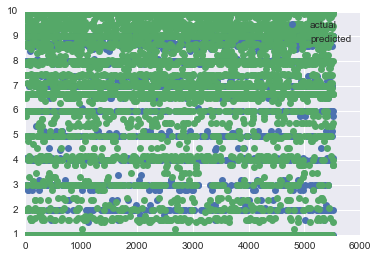

In [136]:
plt.plot(y_test.values, 'o')
plt.plot(y_pred, 'o')
plt.legend(['actual', 'predicted'])

In [33]:
resid = y_pred - y_test.values
print resid.mean()
abs_resid = abs(resid).mean()
plt.plot(resid, 'o-')
plt.axhline(resid.mean(), color = 'r')
plt.axhline(abs_resid, color = 'g')

0.023873959674


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_test, y_pred)

0.11195728595156362

In [36]:
# plt.plot(y_pred)
# plt.plot(y_test.values)
#plt.Figure(figsize = (5, 6))

Best score: 3.35467362069
Best depth: 8


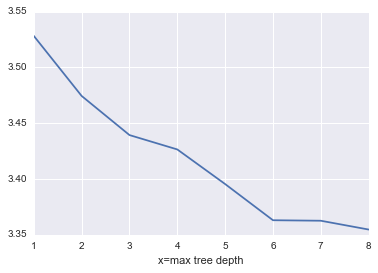

In [37]:
all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 9):
    dtreg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(dtreg, X, y, cv=3, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
dtreg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
dtreg.fit(X, y)

plt.figure()
plt.plot(range(1, 9), all_scores)
plt.xlabel('x=max tree depth')

In [137]:
import pydot
from sklearn import tree

# convert the column headers to a list
test = list(X.columns.values)

In [138]:
type(test)

list

In [139]:
#test

In [140]:
# remove the unicode!
tester = [x.encode('UTF8') for x in test]


In [141]:
#tester

# Print tree!!! 

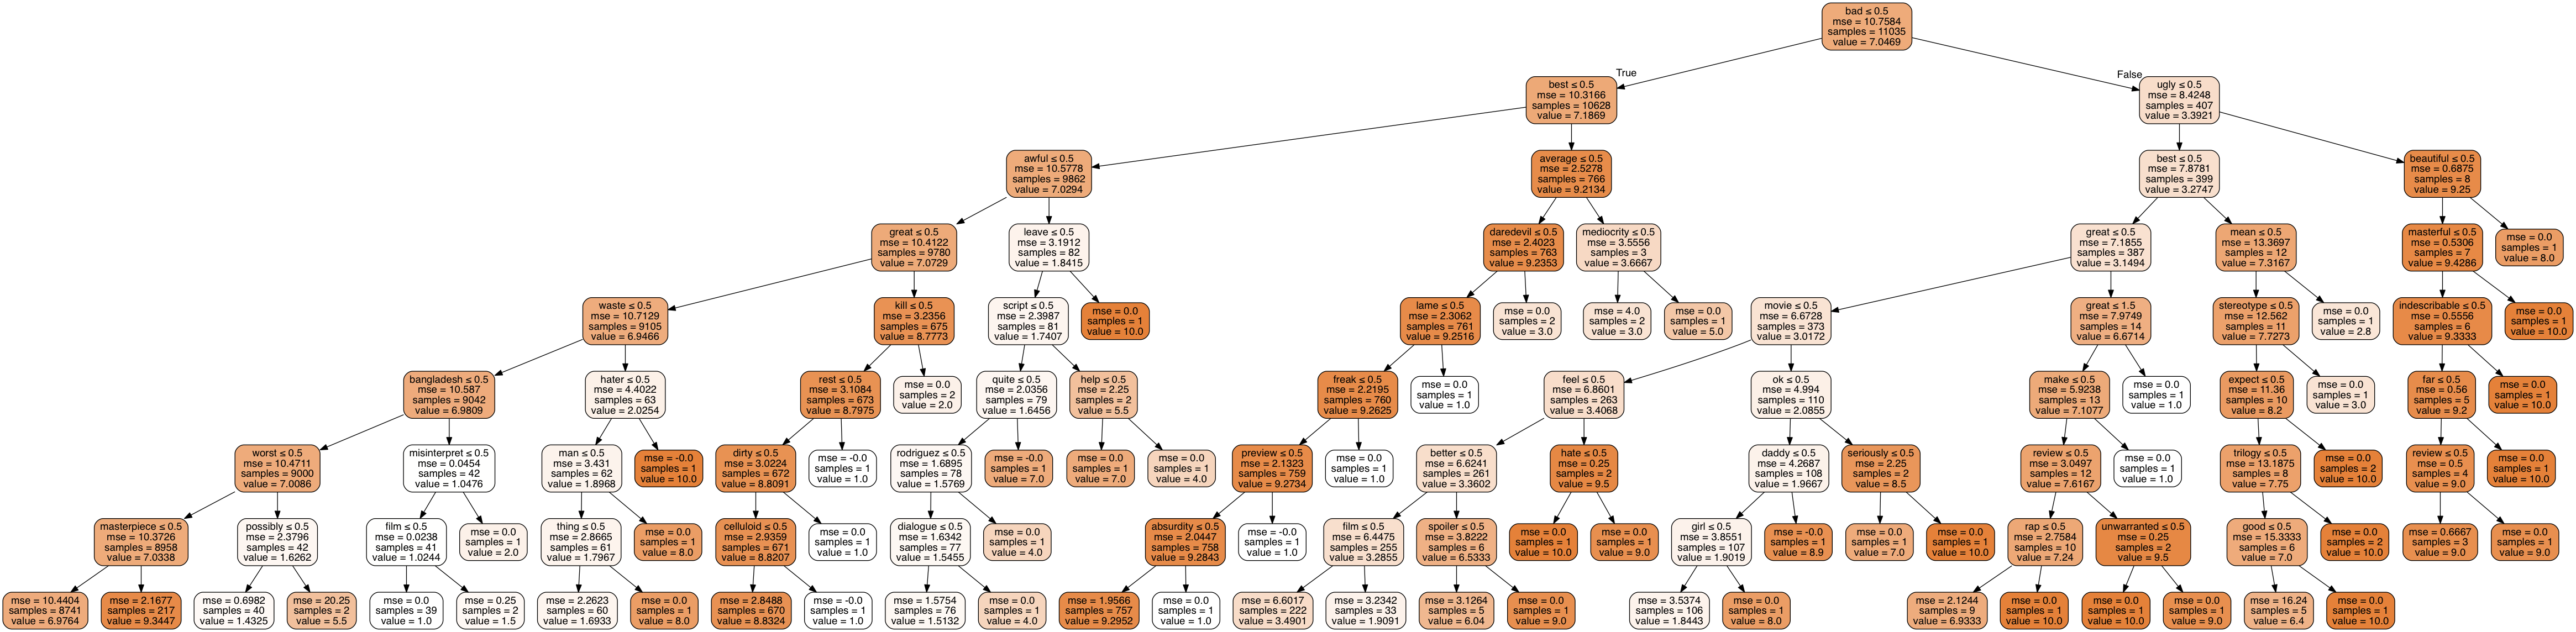

In [43]:
dot_data = StringIO()  
export_graphviz(dtreg, out_file=dot_data, 
                feature_names=tester,  
                filled=True, rounded=True, 
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

# Export png!

In [270]:
import pydot
from sklearn import tree

dotfile = StringIO()
tree.export_graphviz(dtreg, out_file=dotfile,
                    feature_names =tester,
                    filled = True,rounded=True,  
                    special_characters=True)
pydot.graph_from_dot_data(dotfile.getvalue()).write_png("dtree4.png")

True

# Top 20 words 

In [53]:
word_counts = X.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

movie          1966
film           1038
best            808
great           730
good            589
bad             425
time            424
make            389
classic         266
masterpiece     238
better          222
just            220
watch           213
sequel          199
like            185
story           182
life            176
fun             164
review          156
amazing         154
dtype: int64

In [79]:
print 'this is the predicted rating:', y_pred[5]

this is the predicted rating: 6.97643290241


In [75]:
y_test.head()

review_score
1881          10.0
1771           3.0
1509           9.0
7160          10.0
8037          10.0

In [142]:
# predicst mainly 3s, 6s, 9s which was the initial goal of the test was to see 
# if people thought the movie was great, good or bad.

#print 'predicted: ', [i for i in y_pred]

# Let's try some other models

In [102]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
pd.get_dummies(df[])

In [54]:
test = DictVectorizer(df['summary_review'])

In [57]:
print test[0]

TypeError: 'DictVectorizer' object does not support indexing

In [143]:
df2 = df

In [144]:
import nltk

tmpL=[]
for i in df2['summary_review']:
    tmpL.append(nltk.word_tokenize(i))


In [ ]:
#tmpL

In [105]:
df2 = df

In [146]:
df2['summary_review'] = [i for i in tmpL]

In [148]:
df2.head()

title          location  \
0  Raptor Ranch     United States   
1  Raptor Ranch    United Kingdom   
2  Raptor Ranch           Denmark   
3  Raptor Ranch  Hamburg, Germany   
4  Raptor Ranch     United States   

                                      summary_review  review_score  \
0                                [really, not, good]           2.0   
1  [you, 're, better, off, stay, well, clear, fro...           1.0   
2  [so, messy, it, should, be, raptor, ranch, dre...           2.0   
3                            [of, reptile, and, man]           3.1   
4                [a, lot, better, then, people, say]           7.0   

   movie_score   genre  
0          3.1  Action  
1          3.1  Action  
2          3.1  Action  
3          3.1  Action  
4          3.1  Action

In [157]:
TESTlist = []

for i in df2['summary_review']:
    TESTlist.append(i)

In [ ]:
#TESTlist

In [162]:


testX = pd.DataFrame([pd.get_dummies(i) for i in df['summary_review']])


In [163]:
testX.head()

0
0     good  not  really
0   0.0  0.0     1.0
1   ...
1     're  better  clear  from  off  ranch  stay ...
2     ...   be  dressing   it  messy  ranch  rapt...
3     and  man   of  reptile
0  0.0  0.0  1.0    ...
4       a  better  lot  people  say  then
0  1.0 ...

In [151]:
listTest = []

for i in df['summary_review']:
    listTest.append(pd.get_dummies(i))
    
# X1 = pd.get_dummies(df2['summary_review'][0])


In [ ]:
# need to concat all these together somehow....
##listTest

In [ ]:
for i in listTest:
    
    print i
#
#    pd.concat(listTest[i], axis=1)

   good  not  really
0   0.0  0.0     1.0
1   0.0  1.0     0.0
2   1.0  0.0     0.0
   're  better  clear  from  off  ranch  stay  this  well  you
0  0.0     0.0    0.0   0.0  0.0    0.0   0.0   0.0   0.0  1.0
1  1.0     0.0    0.0   0.0  0.0    0.0   0.0   0.0   0.0  0.0
2  0.0     1.0    0.0   0.0  0.0    0.0   0.0   0.0   0.0  0.0
3  0.0     0.0    0.0   0.0  1.0    0.0   0.0   0.0   0.0  0.0
4  0.0     0.0    0.0   0.0  0.0    0.0   1.0   0.0   0.0  0.0
5  0.0     0.0    0.0   0.0  0.0    0.0   0.0   0.0   1.0  0.0
6  0.0     0.0    1.0   0.0  0.0    0.0   0.0   0.0   0.0  0.0
7  0.0     0.0    0.0   1.0  0.0    0.0   0.0   0.0   0.0  0.0
8  0.0     0.0    0.0   0.0  0.0    0.0   0.0   1.0   0.0  0.0
9  0.0     0.0    0.0   0.0  0.0    1.0   0.0   0.0   0.0  0.0
   ...   be  dressing   it  messy  ranch  raptor  should   so
0  0.0  0.0       0.0  0.0    0.0    0.0     0.0     0.0  1.0
1  0.0  0.0       0.0  0.0    1.0    0.0     0.0     0.0  0.0
2  0.0  0.0       0.0  1.0    0.0    

In [ ]:
#[pd.DataFrame(i) for i in listTest]

In [153]:
df2['test'] = [pd.DataFrame(i) for i in listTest]

In [154]:
df2.head(2)

title        location  \
0  Raptor Ranch   United States   
1  Raptor Ranch  United Kingdom   

                                      summary_review  review_score  \
0                                [really, not, good]           2.0   
1  [you, 're, better, off, stay, well, clear, fro...           1.0   

   movie_score   genre                                               test  
0          3.1  Action     good  not  really
0   0.0  0.0     1.0
1   ...  
1          3.1  Action     're  better  clear  from  off  ranch  stay ...

In [ ]:
#df['test']

In [150]:
from sklearn.preprocessing import LabelEncoder
y1 = LabelEncoder().fit_transform(df2['review_score'])
   
X1 = pd.get_dummies(df2['summary_review'][0])
print X1.head()

   good  not  really
0   0.0  0.0     1.0
1   0.0  1.0     0.0
2   1.0  0.0     0.0


In [41]:
y1

array([ 4,  0,  4, ..., 39, 39, 43])